In [1]:
#Metadados
__author__ = "Luidy"
__version__ = "0.3.0"
__status__ = "Refactoring"

#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ferramentas de Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Configuração visual
sns.set(style="whitegrid")

In [2]:
#carregando a base de dados
dataframe = pd.read_csv("survey_lung_cancer.csv")

#vizalizando o dataframe ainda "sujo"
dataframe

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [3]:
#traduzindo as colunas do dataframe
traducao = {
    'GENDER': 'GENERO', 'AGE': 'IDADE', 'SMOKING': 'FUMANTE', 
    'YELLOW_FINGERS': 'DEDOS_AMARELOS', 'ANXIETY': 'ANSIEDADE', 
    'PEER_PRESSURE': 'PRESSAO_SOCIAL', 'CHRONIC DISEASE': 'DOENCA_CRONICA', 
    'FATIGUE': 'FADIGA', 'ALLERGY': 'ALERGIA', 'WHEEZING': 'CHIADO_PEITO', 
    'ALCOHOL CONSUMING': 'CONSUMO_ALCOOL', 'COUGHING': 'TOSSE', 
    'SHORTNESS OF BREATH': 'FALTA_AR', 'SWALLOWING DIFFICULTY': 'DIFICULDADE_ENGOLIR', 
    'CHEST PAIN': 'DOR_PEITO', 'LUNG_CANCER': 'CANCER_PULMAO'
}

#limpando espaços nos nomes das colunas
dataframe.columns = dataframe.columns.str.strip()
dataframe = dataframe.rename(columns=traducao)
dataframe

,GENERO,IDADE,FUMANTE,DEDOS_AMARELOS,ANSIEDADE,PRESSAO_SOCIAL,DOENCA_CRONICA,FADIGA,ALERGIA,CHIADO_PEITO,CONSUMO_ALCOOL,TOSSE,FALTA_AR,DIFICULDADE_ENGOLIR,DOR_PEITO,CANCER_PULMAO
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [4]:
#Tratando os dados
print("Verificando se ha dados vazios")
print(dataframe.isnull().sum())
print("-"*40)

print("Veridficando duplicidades")
print(dataframe.duplicated().sum())
print("-"*40)

print("Verificando se a valores fora do escopo esperado")
for i in dataframe.columns:
    print(dataframe[i].unique())
print("-"*40)

print("excluindo duplicatas")
dataframe = dataframe.drop_duplicates()
print("-"*40)

print("Como o dataframe esta agora")
print(dataframe.shape)
print("-"*40)

Verificando se ha dados vazios
GENERO                 0
IDADE                  0
FUMANTE                0
DEDOS_AMARELOS         0
ANSIEDADE              0
PRESSAO_SOCIAL         0
DOENCA_CRONICA         0
FADIGA                 0
ALERGIA                0
CHIADO_PEITO           0
CONSUMO_ALCOOL         0
TOSSE                  0
FALTA_AR               0
DIFICULDADE_ENGOLIR    0
DOR_PEITO              0
CANCER_PULMAO          0
dtype: int64
----------------------------------------
Veridficando duplicidades
33
----------------------------------------
Verificando se a valores fora do escopo esperado
['M' 'F']
[69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
[1 2]
[2 1]
[2 1]
[1 2]
[1 2]
[2 1]
[1 2]
[2 1]
[2 1]
[2 1]
[2 1]
[2 1]
[2 1]
['YES' 'NO']
----------------------------------------
excluindo duplicatas
----------------------------------------
Como o dataframe esta agora
(276, 16)
----------------------------------

In [5]:
#traduzindo as strings para boleano
dataframe = pd.get_dummies(dataframe,drop_first=True)
print("Dummies criados")
print("-"*40)

#definindo dependencias e independencias 
x = dataframe.drop("CANCER_PULMAO_YES", axis=1)
y = dataframe["CANCER_PULMAO_YES"]

#definindo variaveis para treinamento e teste
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,test_size=0.3,random_state=42)
print("Variaveis de treinamento Definidas")
print("-"*40)

#configurando validação cruzada
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
print("Validação cruzada Configurada")
print("-"*40)

#definindo algoritimos para a comparação de desempenho
algoritimos = {
    "Regressão Logística": LogisticRegression(max_iter=1000, random_state=42),
    "Árvore de Decisão":   DecisionTreeClassifier(random_state=42),
    "Random Forest":       RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (Support Vector)": SVC(probability=True, random_state=42),
    "Gradient Boosting":   GradientBoostingClassifier(random_state=42)
}
print("Algoritimos para avaliação definidos")
print("-"*40)

Dummies criados
----------------------------------------
Variaveis de treinamento Definidas
----------------------------------------
Validação cruzada Configurada
----------------------------------------
Algoritimos para avaliação definidos
----------------------------------------


In [6]:
melhor_algoritimo_nome = ""
melhor_algoritimo_objeto = None
melhor_acuracia = 0
media_comparativa = 0

print(f"{'ALGORITMO':<25} | {'MÉDIA (CV)':<12} | {'ESTABILIDADE (Desvio)'}")
print("_"*65)
#cada agoritimo sera treinado e testado 10 vezes com
for nome, algoritimo in algoritimos.items():
    scores = cross_val_score(algoritimo,x_treino,y_treino,cv=kfold,scoring='accuracy')

    media = scores.mean()
    desvio = scores.std()

    print(f"{nome:<25} | {media*100:.2f}% | [+/-]{desvio*100:.2f}%")

    if media-desvio > media_comparativa:
        melhor_algoritimo_nome = nome
        melhor_algoritimo_objeto = algoritimo
        melhor_acuracia = media
        media_comparativa = media - desvio
        
print("-"*65)
print(f"Melhor algoritimo: {melhor_algoritimo_nome}")
print(f"com acuracia media de {melhor_acuracia*100:.2f}%")
    

ALGORITMO                 | MÉDIA (CV)   | ESTABILIDADE (Desvio)
_________________________________________________________________
Regressão Logística       | 89.16% | [+/-]5.32%
Árvore de Decisão         | 82.39% | [+/-]6.25%
Random Forest             | 87.08% | [+/-]5.74%
SVM (Support Vector)      | 87.08% | [+/-]2.41%
Gradient Boosting         | 84.95% | [+/-]6.46%
-----------------------------------------------------------------
Melhor algoritimo: SVM (Support Vector)
com acuracia media de 87.08%


In [7]:
melhor_algoritimo_nome = ""
melhor_algoritimo_objeto = None
melhor_acuracia = 0
media_comparativa = 0

print(f"{'ALGORITMO':<25} | {'MÉDIA (CV)':<12} | {'ESTABILIDADE (Desvio)'}")
print("_"*65)
#cada agoritimo sera treinado e testado 10 vezes com
for nome, algoritimo in algoritimos.items():
    scores = cross_val_score(algoritimo,x,y,cv=kfold,scoring='accuracy')

    media = scores.mean()
    desvio = scores.std()

    print(f"{nome:<25} | {media*100:.2f}% | [+/-]{desvio*100:.2f}%")

    if media-desvio > media_comparativa:
        melhor_algoritimo_nome = nome
        melhor_algoritimo_objeto = algoritimo
        melhor_acuracia = media
        media_comparativa = media - desvio
        
print("-"*65)
print(f"Melhor algoritimo: {melhor_algoritimo_nome}")
print(f"com acuracia media de {melhor_acuracia*100:.2f}%")
    

ALGORITMO                 | MÉDIA (CV)   | ESTABILIDADE (Desvio)
_________________________________________________________________
Regressão Logística       | 90.24% | [+/-]4.23%
Árvore de Decisão         | 88.04% | [+/-]5.33%
Random Forest             | 90.19% | [+/-]3.34%
SVM (Support Vector)      | 86.24% | [+/-]1.34%
Gradient Boosting         | 88.43% | [+/-]5.04%
-----------------------------------------------------------------
Melhor algoritimo: Random Forest
com acuracia media de 90.19%


In [11]:
modelo = melhor_algoritimo_objeto.fit(x_treino,y_treino)

previsoes = modelo.predict(x_teste)
acuracia = accuracy_score(y_teste,previsoes)

print(f"Modelo hold out com algoritimo random forest apresenta precisão de {acuracia*100:.2f}%")

Modelo hold out com algoritimo random forest apresenta precisão de 89.16%


Text(42.25, 0.5, 'Realidade')

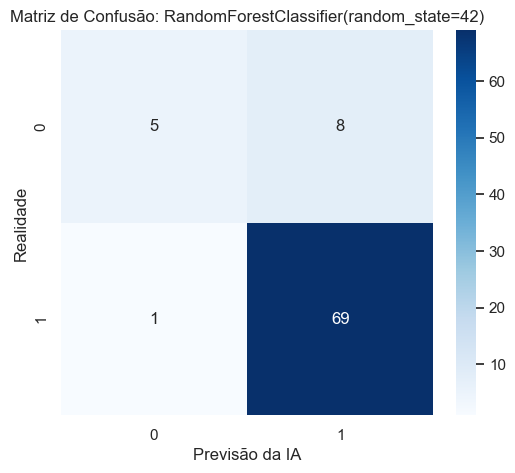

In [12]:
#criando matriz de erro
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_teste, previsoes), annot=True, fmt="d", cmap="Blues")
plt.title(f"Matriz de Confusão: {modelo}")
plt.xlabel("Previsão da IA")
plt.ylabel("Realidade")

Text(0.5, 1.0, 'Os 10 Maiores Fatores de Risco - RandomForestClassifier(random_state=42)')

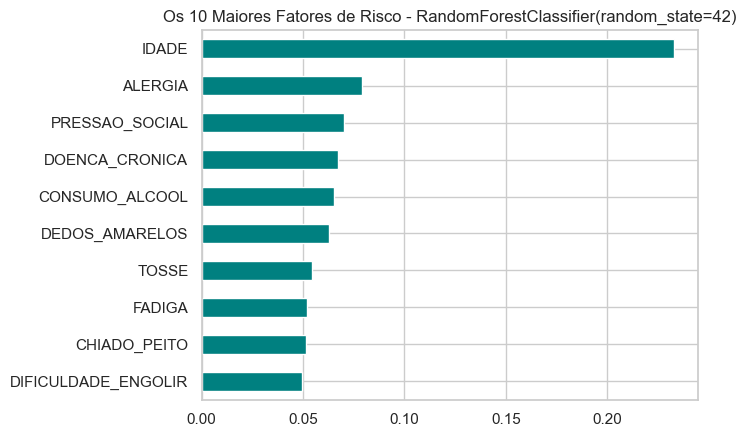

In [14]:
pureza = pd.Series(modelo.feature_importances_, index=x.columns)
pureza.nlargest(10).sort_values().plot(kind="barh", color="teal")
plt.title(f"Os 10 Maiores Fatores de Risco - {modelo}")

In [19]:
correlacao = dataframe['FUMANTE'].corr(dataframe['CANCER_PULMAO_YES'].map({True: 1, False: 0}))
print(f"Correlação: {correlacao*100:.2f}%")

Correlação: 3.49%


In [20]:
proporcao = pd.crosstab(dataframe['FUMANTE'], dataframe['CANCER_PULMAO_YES'], normalize='index')
print(proporcao)

CANCER_PULMAO_YES     False     True 
FUMANTE                              
1                  0.150794  0.849206
2                  0.126667  0.873333
